In [309]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

loading data set

In [310]:
dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [311]:
dataframe = dataframe.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis=1)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [312]:
new_columns = {'Temperature (C)':'x1', 'Apparent Temperature (C)':'y', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
          'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5', 'Pressure (millibars)':'x6'}

In [313]:
dataframe.rename(columns=new_columns, inplace=True)

In [314]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
x2,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
x3,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
x4,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
x5,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
x6,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [315]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

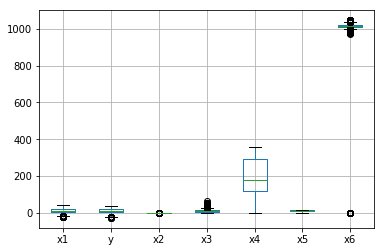

In [316]:
dataframe.boxplot()

In [317]:
 dataframe=dataframe.head(2000)

In [318]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,2000.0,12.057164,8.536671,-8.594444,4.900000,13.058333,17.872222,32.638889
y,2000.0,11.304911,9.509893,-11.911111,2.434722,13.058333,17.872222,35.494444
x2,2000.0,0.792105,0.171283,0.320000,0.670000,0.850000,0.930000,1.000000
x3,2000.0,9.755723,6.036682,0.000000,4.942700,9.064300,13.379100,36.386000
x4,2000.0,204.365000,96.594902,0.000000,142.000000,210.000000,288.250000,359.000000
x5,2000.0,9.359155,4.459319,0.000000,6.456100,9.982000,11.270000,16.100000
x6,2000.0,989.480730,168.278530,0.000000,1010.240000,1014.680000,1024.257500,1042.310000


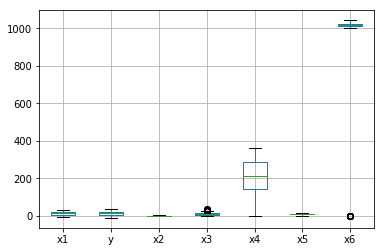

In [319]:
dataframe.boxplot()


In [320]:
# Separating the output and the parameters data frame
def separate(dataframe):
    output = dataframe.y
    return dataframe.drop('y', axis=1), output

In [321]:
# dataframe = dataframe[(dataframe >= dataframe.quantile(0.25)) & (dataframe<dataframe.quantile(0.75))]
# fucntion to get 
def remove_outlier(dataframe):
    dataframe = dataframe[np.abs(dataframe - dataframe.mean()) <= (3 * dataframe.std())]
    return dataframe

In [322]:
def split(dataframe):
    test_data = dataframe.tail(500).reset_index(drop=True)
    return dataframe.head(len(dataframe)-500), test_data

In [323]:
# using min max
def feature_scaling_column(dataframe, column_scaling):
    mean_of_col = dataframe[column_scaling].mean()
    std_of_col = dataframe[column_scaling].std()
    print('for col= {} mean= {} and std={} '.format(column_scaling,mean_of_col,std_of_col))
    for counter in range(0, len(dataframe)):
        dataframe.loc[counter, column_scaling] =  ((dataframe.loc[counter, column_scaling] - mean_of_col) / std_of_col)
    print("successfully scaled column ",column_scaling)
    return dataframe

In [324]:
Ypred = pd.Series(np.zeros(len(dataframe)))


In [325]:
dataframe = remove_outlier(dataframe)

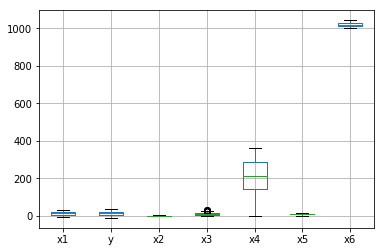

In [326]:
dataframe.boxplot()

In [327]:
dataframe.isna().sum()

x1     0
y      0
x2     0
x3    20
x4     0
x5     0
x6    56
dtype: int64

In [328]:
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

In [329]:
class Multi_Linear_Regression():
    
    
    def __init__(self):
        self.learning_rate = 0.0009
        self.iteration = 2000
        self.ncols=6
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3,self.ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
        
    def train(self, dataframe, output):
        weights = np.full(self.ncols,1.2)
        dframe_size = len(dataframe)
        bais = 1.3

        # Ypred = (dataframe.x1*weight1 + dataframe.x2*weight2 + dataframe.x3*weight3+ dataframe.x4*weight4 + dataframe.x5*weight5 + bais)
        
     
        for iterations in range(0, self.iteration):
            Ypred = self.classify(dataframe, weights,bais)
            diff = np.subtract(Ypred,output)
            # cost = sum(y^ -y)**2)/2m
            cost = np.sum(np.square(diff))/(2*dframe_size)
            if(iterations%100==0):
                print('In training iteration: {}, cost {}, bais:{}'
                      .format(iterations, cost,bais))           
            if(iterations%20==0):
                self.ax1.plot(weights[0],cost,markersize=1, marker='x', color='g')
                self.ax1.set_title('iteration vs cost')
                self.ax2.plot(iterations,cost, markersize=1, marker='x', color='r')
                self.ax2.set_title('iteration vs cost')
                self.ax3.plot(bais,cost, markersize=1, marker = '+', color='#42f48c')
                self.ax3.set_title('bais vs cost')
            for counter1 in range(0, self.ncols):
                weights[counter1] = np.subtract(weights[counter1],
                                      np.multiply(self.learning_rate,np.sum(
                        np.multiply(diff,dataframe.iloc[:,counter1]))))
    
            weights= np.divide(weights,dframe_size)
            bais = np.subtract(bais,np.multiply(self.learning_rate,(np.sum(diff)/dframe_size)))
            
        return weights, bais
        
        
    def classify(self, dataframe, weights, bais):
        Ypred = pd.Series(np.zeros(len(dataframe)))
        dframe_size = len(dataframe)
        for counter1 in range(0, dframe_size):
            for counter2 in range(0, self.ncols):
                Ypred[counter1] = np.add(Ypred[counter1],
                                         np.multiply(
                                             weights[counter2],dataframe.iloc[counter1, counter2]))
        Ypred = np.add(bais,Ypred)
        return Ypred
        
    def accuracy(self,Ypred, y_output):
#         for counter in range(0, len(Ypred)):
#             Ypred[counter]= abs(Ypred[counter]-y_output[counter])/y_output[counter]
        Ypred = np.divide(
            abs(np.subtract(Ypred,y_output))
            ,y_output)
        self.ax4.scatter(np.linspace(-3,1,Ypred.shape[0]),Ypred, marker='+',color='g')
        plt.subplots_adjust(hspace=0.5, wspace = 0.5)
        plt.show()
        self.ax4.set_title("predicted values vs original output")
        error = (np.sum(Ypred))/len(Ypred)
        return (1-error)*100
                

In [330]:
def main(dataframe, test_data):
    try:
        dataframe, output = separate(dataframe)
        regression_object = Multi_Linear_Regression()
        # feature Scaling:
        weights, bais = regression_object.train(dataframe,output)
        print(weights,bais)
        test_data = (test_data[test_data['y']!=0]).reset_index()
        test_data, output = separate(test_data)
        Ypred = regression_object.classify(test_data, weights, bais)
        print(Ypred.head(),"number of zeros in Ypredict:",(Ypred==0).sum())
        print("Accuracy = ", regression_object.accuracy(Ypred,output))
    except Exception as e:
        print('Process stopped because ',e)

In [331]:
# plt.plot(np.random.rand(20))

In [332]:
# np.add(4,dataframe)

In [333]:
dataframe, test_data = split(dataframe)

In [334]:
for item in dataframe:
    dataframe = feature_scaling_column(dataframe, item)

for col= x1 mean= 15.881054931335822 and std=5.998056713025051 
successfully scaled column  x1
for col= y mean= 15.642540574282142 and std=6.488412978484126 
successfully scaled column  y
for col= x2 mean= 0.750175561797752 and std=0.17274041901330772 
successfully scaled column  x2
for col= x3 mean= 9.840163974719088 and std=5.821187515706409 
successfully scaled column  x3
for col= x4 mean= 208.75140449438203 and std=92.20990291828151 
successfully scaled column  x4
for col= x5 mean= 10.989346699438208 and std=3.283134443008306 
successfully scaled column  x5
for col= x6 mean= 1012.8663834269664 and std=5.060837697182491 
successfully scaled column  x6


In [335]:
# from IPython.core.debugger import Tracer; Tracer()()
# dataframe.isnan().sum()


In training iteration: 0, cost 3.157394621225488, bais:1.3
In training iteration: 100, cost 1.2041581045782848, bais:1.18806239446066
In training iteration: 200, cost 1.0878529190333486, bais:1.0857632716396908
In training iteration: 300, cost 0.990714535367247, bais:0.9922727017859162
In training iteration: 400, cost 0.9095843128664036, bais:0.9068322169551734
In training iteration: 500, cost 0.8418241468576555, bais:0.8287486577306403
In training iteration: 600, cost 0.7852306856788042, bais:0.7573885497765567
In training iteration: 700, cost 0.7379636844765245, bais:0.6921729646035565
In training iteration: 800, cost 0.6984861661180748, bais:0.6325728228521809
In training iteration: 900, cost 0.6655144434341622, bais:0.5781046019911547
In training iteration: 1000, cost 0.6379763776704073, bais:0.5283264136079525
In training iteration: 1100, cost 0.6149765158409584, bais:0.4828344184675979
In training iteration: 1200, cost 0.5957669733584945, bais:0.4412595502558733
In training itera

<Figure size 432x288 with 0 Axes>

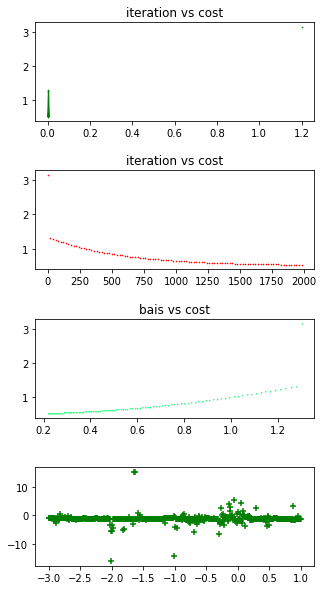

Accuracy =  -12.421756328899857


In [336]:
main(dataframe,test_data)